In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv("traffic_weather_full2020.csv")
df.head()

C:\Users\dmhan\AppData\Local\Temp\ipykernel_22336\4046587241.py:2: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("traffic_weather_full2020.csv")


,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2/1/2020 0:00,338,66.0,6,1,2/1/2020 0:00,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
1,2/1/2020 0:05,360,65.5,6,1,2/1/2020 0:05,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
2,2/1/2020 0:10,347,65.2,6,1,2/1/2020 0:10,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
3,2/1/2020 0:15,337,65.4,6,1,2/1/2020 0:15,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
4,2/1/2020 0:20,302,66.3,6,1,2/1/2020 0:20,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34823 entries, 0 to 34822
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5 Minutes    34823 non-null  object 
 1   Flow         34823 non-null  int64  
 2   (mph)        34823 non-null  float64
 3   week_day     34823 non-null  int64  
 4   holidays     34823 non-null  int64  
 5   Hour         34823 non-null  object 
 6   Day          34823 non-null  object 
 7   Time         34823 non-null  object 
 8   Temperature  34823 non-null  object 
 9   Dew Point    34823 non-null  object 
 10  Humidity     34823 non-null  float64
 11  Wind         34655 non-null  object 
 12  Wind Speed   34823 non-null  object 
 13  Wind Gust    34823 non-null  object 
 14  Pressure     34823 non-null  float64
 15  Precip.      34823 non-null  float64
 16  Condition    34799 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 4.5+ MB


### Data Processing

In [5]:
wind_speed = df['Wind Speed'].unique()
wind_speed

array(['3', '0', '5', '7', '8', '13', '16', '12', '9', '6', '15', '21',
       '18', '23', '24', '20', '22', '17', '20mph', '10', '14', '11mph',
       '30', '36', '33', '29', '28', '26', '12mph', '8mph', '9 mph', 5, 9,
       0, 3, 7, 6, 10, 8, 12, 13, 14], dtype=object)

In [6]:
wind_gust = df['Wind Gust'].unique()
wind_gust

array(['0', '17', '22', '29', '31', '38', '26', '30', '32', '35', '33',
       '23', '25', '16', '20', '13mph', '24', '37', '59', '45', '47',
       '44', '46', '36', '28', '21', '18', 0, 18], dtype=object)

In [7]:
# Define the function for extracting float numbers
def extract_float(value, string):
    return float(str(value).strip().replace(string, ''))

# Extract number from 'Wind Speed' and 'Wind Gust' columns and then convert to float
df['Wind Speed'] = df['Wind Speed'].apply(lambda x: extract_float(x, 'mph'))
df['Wind Gust'] = df['Wind Gust'].apply(lambda x: extract_float(x, 'mph'))

# Extract number from 'Dew Point' and 'Temperature' and then convert to float
df['Temperature'] = df['Temperature'].apply(lambda x: extract_float(x, 'F'))
df['Dew Point'] = df['Dew Point'].apply(lambda x: extract_float(x, 'F'))

df.head()

,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2/1/2020 0:00,338,66.0,6,1,2/1/2020 0:00,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair
1,2/1/2020 0:05,360,65.5,6,1,2/1/2020 0:05,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair
2,2/1/2020 0:10,347,65.2,6,1,2/1/2020 0:10,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair
3,2/1/2020 0:15,337,65.4,6,1,2/1/2020 0:15,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair
4,2/1/2020 0:20,302,66.3,6,1,2/1/2020 0:20,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair


In [8]:
# Check if '5 Minutes' and 'Hour' columns are identical
are_columns_identical = (df['5 Minutes'] == df['Hour']).all()

print(f"Are the '5 Minutes' and 'Hour' columns identical? {are_columns_identical}")

Are the '5 Minutes' and 'Hour' columns identical? True


In [9]:
# Convert the '5 Minutes' column to datetime
df['5 Minutes'] = pd.to_datetime(df['5 Minutes'], errors='coerce')

# Keep only the hour in the 'Hour' colum
df['Hour'] = df['5 Minutes'].dt.hour

df['Day_of_Month'] = df['5 Minutes'].dt.day

# Drop unrelavant column 'Time'
df = df.drop(columns=['Time', 'Day'])

### Handling Missing Values

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
print(f"Missing values percentage (%):")
df.isnull().sum()/len(df) * 100

Missing values percentage (%):


5 Minutes       0.00000
Flow            0.00000
(mph)           0.00000
week_day        0.00000
holidays        0.00000
Hour            0.00000
Temperature     0.00000
Dew Point       0.00000
Humidity        0.00000
Wind            0.48244
Wind Speed      0.00000
Wind Gust       0.00000
Pressure        0.00000
Precip.         0.00000
Condition       0.06892
Day_of_Month    0.00000
dtype: float64

In [12]:
# Fill NA values with the last known value (forward fill)
df['Wind'] = df['Wind'].ffill()
df['Condition'] = df['Condition'].ffill()

In [13]:
print(f"Missing values percentage (%) after imputation:")
df.isnull().sum() / len(df) * 100

Missing values percentage (%) after imputation:


5 Minutes       0.0
Flow            0.0
(mph)           0.0
week_day        0.0
holidays        0.0
Hour            0.0
Temperature     0.0
Dew Point       0.0
Humidity        0.0
Wind            0.0
Wind Speed      0.0
Wind Gust       0.0
Pressure        0.0
Precip.         0.0
Condition       0.0
Day_of_Month    0.0
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34823 entries, 0 to 34822
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   5 Minutes     34823 non-null  datetime64[ns]
 1   Flow          34823 non-null  int64         
 2   (mph)         34823 non-null  float64       
 3   week_day      34823 non-null  int64         
 4   holidays      34823 non-null  int64         
 5   Hour          34823 non-null  int32         
 6   Temperature   34823 non-null  float64       
 7   Dew Point     34823 non-null  float64       
 8   Humidity      34823 non-null  float64       
 9   Wind          34823 non-null  object        
 10  Wind Speed    34823 non-null  float64       
 11  Wind Gust     34823 non-null  float64       
 12  Pressure      34823 non-null  float64       
 13  Precip.       34823 non-null  float64       
 14  Condition     34823 non-null  object        
 15  Day_of_Month  34823 non-null  int32 

### Feature Engineering

#### Creating lag features

In [15]:
# Create lag features (for previous 1, 2, and 3 intervals)
df['Flow_Lag1'] = df['Flow'].shift(1)
df['Flow_Lag2'] = df['Flow'].shift(2)
df['Flow_Lag3'] = df['Flow'].shift(3)

# Drop rows with NaN values in the lag features
df = df.dropna(subset=['Flow_Lag1', 'Flow_Lag2', 'Flow_Lag3'])



In [16]:
df.isnull().sum()

5 Minutes       0
Flow            0
(mph)           0
week_day        0
holidays        0
Hour            0
Temperature     0
Dew Point       0
Humidity        0
Wind            0
Wind Speed      0
Wind Gust       0
Pressure        0
Precip.         0
Condition       0
Day_of_Month    0
Flow_Lag1       0
Flow_Lag2       0
Flow_Lag3       0
dtype: int64

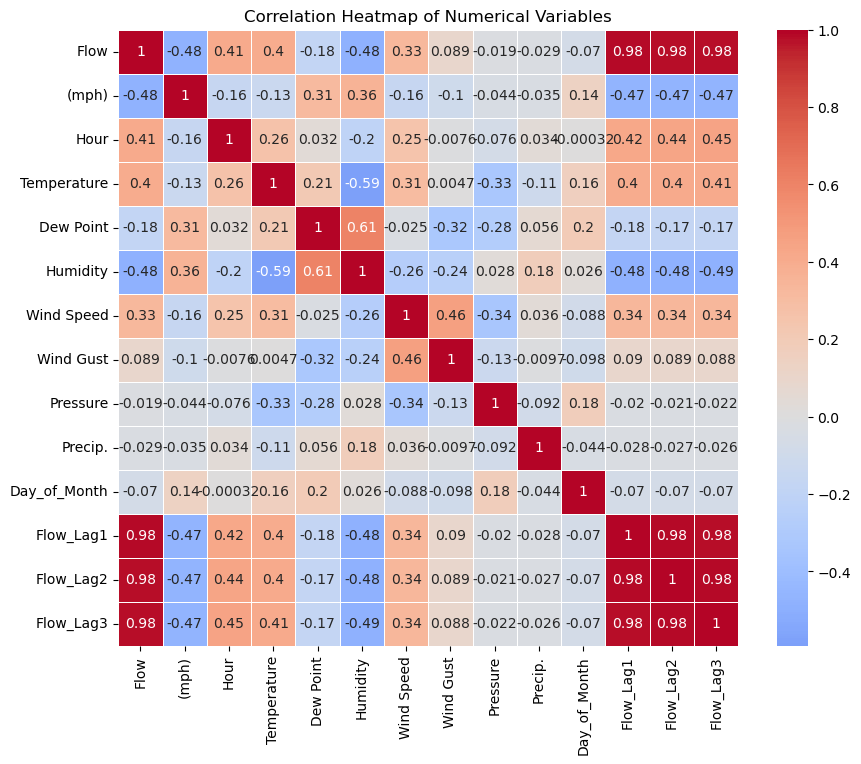

In [17]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['Flow', '(mph)', 'Hour',
       'Temperature', 'Dew Point', 'Humidity', 'Wind Speed',
       'Wind Gust', 'Pressure', 'Precip.', 'Day_of_Month',
       'Flow_Lag1', 'Flow_Lag2', 'Flow_Lag3']].corr()
sns.heatmap(corr_matrix, annot=True, center=0, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


lag features (representing previous traffic flow values) show a strong correlation with current flow, highlighting the time-dependent nature of traffic and the importance of incorporating past flow data.

In [18]:
corr_matrix

,Flow,(mph),Hour,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precip.,Day_of_Month,Flow_Lag1,Flow_Lag2,Flow_Lag3
Flow,1.000000,-0.475401,0.412088,0.400076,-0.176293,-0.482681,0.334303,0.089479,-0.019326,-0.028685,-0.070363,0.984021,0.979452,0.975187
(mph),-0.475401,1.000000,-0.157664,-0.132714,0.314209,0.362228,-0.159376,-0.101316,-0.043711,-0.034916,0.137826,-0.473271,-0.472779,-0.473115
Hour,0.412088,-0.157664,1.000000,0.262642,0.032287,-0.203581,0.248373,-0.007605,-0.075788,0.033924,-0.000318,0.423830,0.435491,0.446838
Temperature,0.400076,-0.132714,0.262642,1.000000,0.211539,-0.592084,0.307042,0.004651,-0.327373,-0.112062,0.164426,0.402414,0.404732,0.407088
Dew Point,-0.176293,0.314209,0.032287,0.211539,1.000000,0.605045,-0.024756,-0.322499,-0.277032,0.055511,0.201237,-0.175163,-0.173962,-0.172826
Humidity,-0.482681,0.362228,-0.203581,-0.592084,0.605045,1.000000,-0.262592,-0.243658,0.028010,0.176764,0.025653,-0.483829,-0.484889,-0.486042
Wind Speed,0.334303,-0.159376,0.248373,0.307042,-0.024756,-0.262592,1.000000,0.463400,-0.339632,0.035625,-0.087677,0.336450,0.338665,0.340683
Wind Gust,0.089479,-0.101316,-0.007605,0.004651,-0.322499,-0.243658,0.463400,1.000000,-0.128735,-0.009674,-0.098444,0.089627,0.089057,0.088321
Pressure,-0.019326,-0.043711,-0.075788,-0.327373,-0.277032,0.028010,-0.339632,-0.128735,1.000000,-0.091510,0.176537,-0.020408,-0.021442,-0.022440
Precip.,-0.028685,-0.034916,0.033924,-0.112062,0.055511,0.176764,0.035625,-0.009674,-0.091510,1.000000,-0.043702,-0.027914,-0.026879,-0.025988


#### Converting categorical columns into numerical

In [19]:
wind = df['Wind'].unique()
wind

array(['VAR', 'NNE', 'NNW', 'CALM', 'N', 'SE', 'SSE', 'S', 'ESE', 'NW',
       'NE', 'WNW', 'W', 'ENE', 'E', 'WSW', 'SSW', 'SW'], dtype=object)

In [20]:
condition = df['Condition'].unique()
condition

array(['Fair', 'Partly Cloudy', 'Mostly Cloudy', 'Cloudy', 'Fair / Windy',
       'Partly Cloudy / Windy', 'Light Rain', 'Fog', 'Cloudy / Windy',
       'Mostly Cloudy / Windy', 'Blowing Dust', 'Haze',
       'Thunder in the Vicinity', 'Rain', 'Heavy Rain'], dtype=object)

In [21]:
# Importing necessary library
from sklearn.preprocessing import OneHotEncoder

# Step 1: Create separate instances of OneHotEncoder for Wind and Condition
encoder_wind = OneHotEncoder(sparse_output=False)  # Replaced `sparse` with `sparse_output`
encoder_condition = OneHotEncoder(sparse_output=False)  # Replaced `sparse` with `sparse_output`

# Step 2: Apply One-Hot Encoding to 'Wind' and 'Condition'
wind_encoded = encoder_wind.fit_transform(df[['Wind']])
condition_encoded = encoder_condition.fit_transform(df[['Condition']])

# Step 3: Convert back to DataFrame with appropriate column names
wind_encoded_df = pd.DataFrame(wind_encoded, columns=encoder_wind.get_feature_names_out(['Wind']))
condition_encoded_df = pd.DataFrame(condition_encoded, columns=encoder_condition.get_feature_names_out(['Condition']))

# Reset index of the encoded DataFrames
wind_encoded_df.reset_index(drop=True, inplace=True)
condition_encoded_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Concatenate DataFrames again
df_encoded = pd.concat([df, wind_encoded_df, condition_encoded_df], axis=1)


# Step 5: Drop the original 'Wind' and 'Condition' columns
df_encoded.drop(['Wind', 'Condition'], axis=1, inplace=True)

# Check the first few rows of the new dataframe
df_encoded.head()



,5 Minutes,Flow,(mph),week_day,holidays,Hour,Temperature,Dew Point,Humidity,Wind Speed,...,Condition_Fog,Condition_Haze,Condition_Heavy Rain,Condition_Light Rain,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Thunder in the Vicinity
0,2020-02-01 00:15:00,337,65.4,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-01 00:20:00,302,66.3,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-01 00:25:00,282,65.3,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-01 00:30:00,302,66.2,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-01 00:35:00,277,66.2,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Save the cleaned data for subsequent analysis
df_encoded.to_csv('traffic_weather_full2020_cleaned.csv', index=False)
